In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



info_tourism = pd.read_csv("tourism_with_id.csv")
tourism_rating = pd.read_csv("tourism_rating.csv")
users = pd.read_csv("user.csv")

In [2]:
info_tourism.sample(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
135,136,Grojogan Watu Purbo Bangunrejo,Objek wisata itu tak adalah Grojogan Watu Purb...,Taman Hiburan,Yogyakarta,10000,4.5,90.0,"{'lat': -7.6340172, 'lng': 110.33837}",-7.634017,110.338370,NaN,136
207,208,Taman Sungai Mudal,"Taman Sungai Mudal, sebuah objek wisata alam t...",Cagar Alam,Yogyakarta,10000,4.6,150.0,"{'lat': -7.762813599999998, 'lng': 110.1161626}",-7.762814,110.116163,NaN,208
257,258,Museum Gedung Sate,Salah satu museum yang menjadi ikon kota ini a...,Budaya,Bandung,5000,4.6,NaN,"{'lat': -6.902637899999999, 'lng': 107.619169}",-6.902638,107.619169,NaN,258
30,31,Wisata Alam Mangrove Angke,Jangan anggap di Jakarta tidak ada wisata alam...,Cagar Alam,Jakarta,25000,4.3,NaN,"{'lat': -6.105334, 'lng': 106.735584}",-6.105334,106.735584,NaN,31
258,259,Monumen Perjuangan Rakyat Jawa Barat,Monumen Perjuangan Rakyat Jawa Barat (Monju) a...,Budaya,Bandung,0,4.5,45.0,"{'lat': -6.8934327, 'lng': 107.6185513}",-6.893433,107.618551,NaN,259


In [3]:
tourism_rating.sample(5)

,User_Id,Place_Id,Place_Ratings
6200,186,220,3
8232,248,346,5
9072,273,291,2
5939,179,251,5
3760,115,92,5


In [4]:
users.sample(5)

,User_Id,Location,Age
196,197,"Bogor, Jawa Barat",27
158,159,"Depok, Jawa Barat",20
117,118,"Karawang, Jawa Barat",32
17,18,"Yogyakarta, DIY",39
190,191,"Karawang, Jawa Barat",32


In [5]:
print(f"Number of places in the datasets : {len(info_tourism.Place_Id.unique())}")
print(f"Number of users : {len(users.User_Id.unique())}")
print(f"The number of ratings given by the user to the dataset : {len(tourism_rating.User_Id)}")

Number of places in the datasets : 437
Number of users : 300
The number of ratings given by the user to the dataset : 10000


In [6]:
info_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
Place_Id        437 non-null int64
Place_Name      437 non-null object
Description     437 non-null object
Category        437 non-null object
City            437 non-null object
Price           437 non-null int64
Rating          437 non-null float64
Time_Minutes    205 non-null float64
Coordinate      437 non-null object
Lat             437 non-null float64
Long            437 non-null float64
Unnamed: 11     0 non-null float64
Unnamed: 12     437 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [7]:
info_tourism.isnull().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [8]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
User_Id          10000 non-null int64
Place_Id         10000 non-null int64
Place_Ratings    10000 non-null int64
dtypes: int64(3)
memory usage: 234.5 KB


In [9]:
tourism_rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
User_Id     300 non-null int64
Location    300 non-null object
Age         300 non-null int64
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [11]:
users.isnull().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [12]:
info_tourism.Category.unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

In [13]:
import numpy as np

tourism_all = np.concatenate((
    info_tourism.Place_Id.unique(),
    tourism_rating.Place_Id.unique()
))

tourism_all = np.sort(np.unique(tourism_all))

print(f"Total number of tourism: {len(tourism_all)}")

Total number of tourism: 437


In [14]:
all_tourism_rate = tourism_rating
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [15]:
all_tourism = pd.merge(all_tourism_rate,info_tourism[["Place_Id","Place_Name","Description","City","Category"]],on='Place_Id', how='left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya
...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah


In [16]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)

In [17]:
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,Surabaya Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,Jakarta Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,Bandung Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,Bandung Tempat Ibadah


In [18]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
City             0
Category         0
city_category    0
dtype: int64

In [19]:
preparation= all_tourism.drop_duplicates("Place_Id")
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,Semarang Budaya
2399,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,Semarang Bahari
2448,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,Jakarta Bahari
2534,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,Jakarta Cagar Alam


In [20]:
place_id = preparation.Place_Id.tolist()

place_name = preparation.Place_Name.tolist()

place_category = preparation.Category.tolist()

place_desc = preparation.Description.tolist()

place_city = preparation.City.tolist()

city_category = preparation.city_category.tolist()

In [21]:
tourism_new = pd.DataFrame({
    "id":place_id,
    "name":place_name,
    "category":place_category,
    "description":place_desc,
    "city":place_city,
    "city_category":city_category
})

tourism_new

,id,name,category,description,city,city_category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya
...,...,...,...,...,...,...
432,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Semarang Budaya
433,350,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Semarang Bahari
434,10,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Jakarta Bahari
435,7,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Jakarta Cagar Alam


C:\Users\hp\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


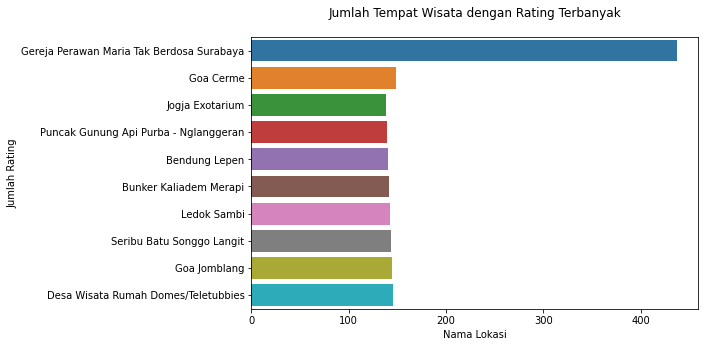

In [22]:
top_10 = tourism_new['id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10,preparation[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

plt.figure(figsize=(8,5))
sns.barplot('Place_Id', 'Place_Name', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Nama Lokasi')
plt.show()

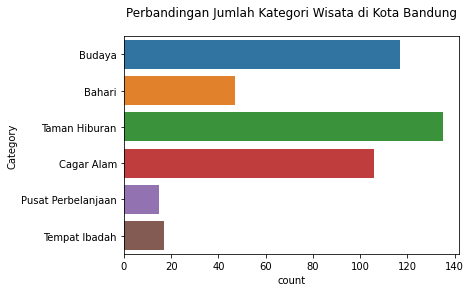

In [23]:
sns.countplot(y='Category', data=preparation)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Bandung', pad=20)
plt.show()

C:\Users\hp\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


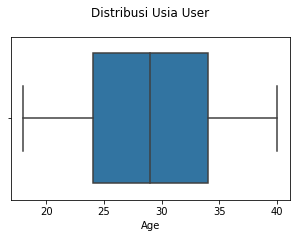

In [24]:
plt.figure(figsize=(5,3))
sns.boxplot(users['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

C:\Users\hp\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


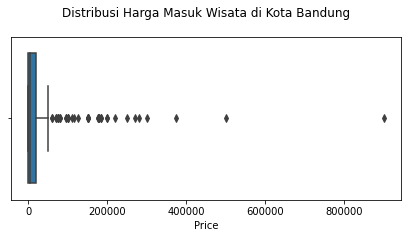

In [25]:
plt.figure(figsize=(7,3))
sns.boxplot(info_tourism['Price'])
plt.title('Distribusi Harga Masuk Wisata di Kota Bandung', pad=20)
plt.show()

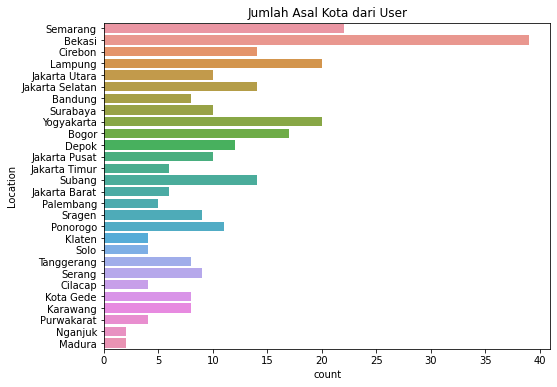

In [26]:
askot = users['Location'].apply(lambda x : x.split(',')[0])

plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

#### 

In [27]:
data = tourism_new
data.sample(5)

,id,name,category,description,city,city_category
67,227,Alun-Alun Kota Bandung,Taman Hiburan,Alun-alun Bandung adalah pusat kota Bandung ya...,Bandung,Bandung Taman Hiburan
312,212,Jalan Braga,Budaya,Jalan Braga adalah nama sebuah jalan utama di ...,Bandung,Bandung Budaya
34,371,Wisata Eling Bening,Cagar Alam,Sebuah fasilitas wisata yang dikelola dengan c...,Semarang,Semarang Cagar Alam
204,205,Desa Wisata Tembi,Taman Hiburan,"Desa Wisata Tembi, merupakan satu dari sekian ...",Yogyakarta,Yogyakarta Taman Hiburan
10,103,Tugu Pal Putih Jogja,Taman Hiburan,"Tugu Yogyakarta (Jawa: , Tugu Ngayogyakarta) a...",Yogyakarta,Yogyakarta Taman Hiburan


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv.fit(data['city_category'])

print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['yogyakarta', 'budaya', 'semarang', 'bahari', 'jakarta', 'taman', 'hiburan', 'bandung', 'cagar', 'alam', 'surabaya', 'pusat', 'perbelanjaan', 'tempat', 'ibadah']


In [29]:
cv_matrix = cv.transform(data['city_category']) 
 
cv_matrix.shape 

(437, 15)

In [30]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 1]], dtype=int64)

In [31]:
pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index = data.name
).sample(5)

,yogyakarta,budaya,semarang,bahari,jakarta,taman,hiburan,bandung,cagar,alam,surabaya,pusat,perbelanjaan,tempat,ibadah
name,,,,,,,,,,,,,,,
Taman Lapangan Banteng,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
Masjid Muhammad Cheng Hoo,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
Museum TNI AL Loka Jala Crana,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
Sam Poo Kong Temple,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
Desa Wisata Gamplong,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [32]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(cv_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40824829],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.40824829, 0.33333333,
        0.66666667],
       ...,
       [0.        , 0.5       , 0.40824829, ..., 1.        , 0.40824829,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.40824829, 1.        ,
        0.        ],
       [0.40824829, 0.        , 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [33]:
cosine_sim_df = pd.DataFrame(cosine_sim,index=data['name'],columns=data['name'])
cosine_sim_df.sample(5,axis=1).sample(10,axis=0)

name,Masjid Agung Ungaran,Tafso Barn,Pantai Nglambor,Museum Basoeki Abdullah,Happyfarm Ciwidey
name,,,,,
Kyotoku Floating Market,0.0,0.408248,0.0,0.500000,0.408248
Keraton Surabaya,0.0,0.000000,0.0,0.500000,0.000000
Watu Goyang,0.0,0.000000,0.5,0.500000,0.000000
Taman Legenda Keong Emas,0.0,0.000000,0.0,0.408248,0.000000
Water Park Bandung Indah,0.0,0.333333,0.0,0.000000,0.333333
Candi Prambanan,0.0,0.000000,0.5,0.500000,0.000000
Pantai Ngobaran,0.0,0.000000,1.0,0.000000,0.000000
Bukit Gantole Cililin,0.0,1.000000,0.0,0.000000,1.000000
Taman Budaya Yogyakarta,0.0,0.000000,0.5,0.500000,0.000000


In [34]:
def tourism_recommendations(place_name,similarity_data=cosine_sim_df,items=data[['name','category','description','city']],k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(place_name,errors='ignore')
    
    return pd.DataFrame(closest).merge(items).head(k)

In [35]:
tourism_recommendations("Air Mancur Menari")

,name,category,description,city
0,Taman Prestasi,Taman Hiburan,Taman Prestasi Surabaya merupakan salah satu t...,Surabaya
1,Taman Pelangi,Taman Hiburan,Kalau pelangi biasanya ada di siang hari pasca...,Surabaya
2,Atlantis Land Surabaya,Taman Hiburan,"Sejak diresmikan pada bulan Desember 2017, Atl...",Surabaya
3,Taman Buah Surabaya,Taman Hiburan,Wisata Taman Buah Undaan di Surabaya adalah sa...,Surabaya
4,Taman Keputran,Taman Hiburan,"Ntah, mengapa nama taman ini disebut dengan ta...",Surabaya


In [36]:
tourism_recommendations("Trans Studio Bandung")

,name,category,description,city
0,Puspa Iptek Sundial,Taman Hiburan,Puspa Iptek Sundial adalah wahana pendidikan y...,Bandung
1,Teras Cikapundung BBWS,Taman Hiburan,Teras Cikapundung Bandung sebelumnya merupakan...,Bandung
2,Chingu Cafe Little Seoul,Taman Hiburan,Selain populer karena memiliki pemandangan yan...,Bandung
3,Taman Badak,Taman Hiburan,Taman Badak ini baru saja diresmikan pada tang...,Bandung
4,NuArt Sculpture Park,Taman Hiburan,NuArt Sculpture Park ini merupakan sebuah gall...,Bandung


In [37]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [38]:
df = tourism_rating
df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [39]:
user_ids = df.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [40]:
place_ids = df.Place_Id.unique().tolist()

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

In [41]:
df['user'] = df.User_Id.map(user_to_user_encoded)

df['place'] = df.Place_Id.map(place_to_place_encoded)

In [42]:
num_users = len(user_to_user_encoded)

num_place = len(place_encoded_to_place)

df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

min_rating = min(df['Place_Ratings'])

max_rating= max(df['Place_Ratings'])

print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


In [43]:
df = df.sample(frac=1,random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


In [44]:
x = df[['user','place']].values

y = df['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

train_indices = int(0.8 * df.shape[0])

x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


In [45]:
from sklearn.metrics import *
from lib.utils import *
p=[]
r=[]
f=[]
ac=[]



In [46]:
ytrain=y_train.astype('int')
yval=y_val.astype('int')

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train, ytrain)
y_pred = model.predict(x_val)
ac.append(accuracy_score(y_pred,yval)*100)
p.append(precision_score(y_pred,yval))
r.append(recall_score(y_pred,yval))
f.append(f1_score(y_pred,yval))

In [47]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train, ytrain)
y_pred = model.predict(x_val)
ac.append(accuracy_score(y_pred,yval,sample_weight=0.8)*100)
p.append(precision_score(y_pred,yval,sample_weight=0.8))
r.append(recall_score(y_pred,yval,sample_weight=0.8))
f.append(f1_score(y_pred,yval,sample_weight=0.8))

In [48]:
from sklearn.svm import SVC
model=SVC(gamma='auto')
model.fit(x_train, ytrain)
y_pred = model.predict(x_val)
ac.append(accuracy_score(y_pred,yval,sample_weight=1)*100)
p.append(precision_score(y_pred,yval,sample_weight=1))
r.append(recall_score(y_pred,yval,sample_weight=1))
f.append(f1_score(y_pred,yval,sample_weight=1))

In [49]:
class RecommenderNet(tf.keras.Model):
 
  
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) 
    self.place_embedding = layers.Embedding( 
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) 
    user_bias = self.user_bias(inputs[:, 0]) 
    place_vector = self.place_embedding(inputs[:, 1]) 
    place_bias = self.place_bias(inputs[:, 1]) 
 
    dot_user_place = tf.tensordot(user_vector, place_vector, 2) 
 
    x = dot_user_place + user_bias + place_bias
    
    return tf.nn.sigmoid(x) 

In [50]:
model = RecommenderNet(num_users, num_place, 100)
 

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [51]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
)

Epoch 1/100
1000/1000 [==============================] - 2s 1ms/step - loss: 0.6958 - root_mean_squared_error: 0.3471 - val_loss: 0.6958 - val_root_mean_squared_error: 0.3467
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6890 - root_mean_squared_error: 0.3421 - val_loss: 0.6954 - val_root_mean_squared_error: 0.3464
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6841 - root_mean_squared_error: 0.3385 - val_loss: 0.6946 - val_root_mean_squared_error: 0.3457
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6791 - root_mean_squared_error: 0.3349 - val_loss: 0.6954 - val_root_mean_squared_error: 0.3463
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6749 - root_mean_squared_error: 0.3318 - val_loss: 0.6970 - val_root_mean_squared_error: 0.3474
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6734 - root_mean_squared_error: 0.3308 - val_l

1000/1000 [==============================] - 1s 1ms/step - loss: 0.6553 - root_mean_squared_error: 0.3172 - val_loss: 0.7161 - val_root_mean_squared_error: 0.3591
Epoch 48/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6571 - root_mean_squared_error: 0.3185 - val_loss: 0.7175 - val_root_mean_squared_error: 0.3599
Epoch 49/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6560 - root_mean_squared_error: 0.3179 - val_loss: 0.7159 - val_root_mean_squared_error: 0.3589
Epoch 50/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6566 - root_mean_squared_error: 0.3181 - val_loss: 0.7151 - val_root_mean_squared_error: 0.3584
Epoch 51/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6569 - root_mean_squared_error: 0.3184 - val_loss: 0.7161 - val_root_mean_squared_error: 0.3591
Epoch 52/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6537 - root_mean_squared_error: 0.3161 - val_loss: 0.

1000/1000 [==============================] - 1s 1ms/step - loss: 0.6541 - root_mean_squared_error: 0.3166 - val_loss: 0.7191 - val_root_mean_squared_error: 0.3608
Epoch 94/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6545 - root_mean_squared_error: 0.3168 - val_loss: 0.7201 - val_root_mean_squared_error: 0.3614
Epoch 95/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6529 - root_mean_squared_error: 0.3156 - val_loss: 0.7215 - val_root_mean_squared_error: 0.3622
Epoch 96/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6564 - root_mean_squared_error: 0.3183 - val_loss: 0.7209 - val_root_mean_squared_error: 0.3620
Epoch 97/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6534 - root_mean_squared_error: 0.3159 - val_loss: 0.7205 - val_root_mean_squared_error: 0.3618
Epoch 98/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6542 - root_mean_squared_error: 0.3164 - val_loss: 0.

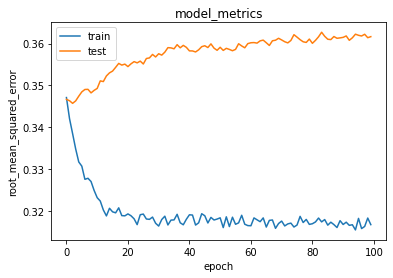

In [52]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

ac.append(accuracy_score(y_pred,yval,sample_weight=0.2)*100)
p.append(precision_score(y_pred,yval,sample_weight=0.2))
r.append(recall_score(y_pred,yval,sample_weight=0.2))
f.append(f1_score(y_pred,yval,sample_weight=0.2))

In [84]:
place_df = tourism_new
df = pd.read_csv('tourism_rating.csv')

user_id = df.User_Id.sample(1).iloc[0]  
place_visited_by_user = df[df.User_Id == user_id]

place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user['Place_Id'].values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [85]:
user_id

61

In [86]:
ratings = model.predict(user_place_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Place with high ratings from user')
print('----' * 8)
 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
pd.DataFrame(place_df_rows)

Showing recommendations for users: 61
Place with high ratings from user
--------------------------------


,id,name,category,description,city,city_category
8,154,Pantai Ngrawe (Mesra),Bahari,Kabupaten Gunungkidul jadi salah satu wilayah ...,Yogyakarta,Yogyakarta Bahari
46,167,Geoforest Watu Payung Turunan,Cagar Alam,Bagi para pemburu keindahan matahari terbit ya...,Yogyakarta,Yogyakarta Cagar Alam
146,255,Museum Barli,Budaya,Museum Barli adalah sebuah museum yang terleta...,Bandung,Bandung Budaya
170,164,Pintoe Langit Dahromo,Cagar Alam,Pintu Langit Dahromo ini menyediakan berbagai ...,Yogyakarta,Yogyakarta Cagar Alam
244,142,Ledok Sambi,Cagar Alam,Desa wisata Ledok Sambi merupakan desa yang me...,Yogyakarta,Yogyakarta Cagar Alam


In [87]:
print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
recommended_place

--------------------------------
Top 10 place recommendation
--------------------------------


,id,name,category,description,city,city_category
44,407,Taman Ekspresi Dan Perpustakaan,Taman Hiburan,Taman Ekspresi Surabaya tidak hanya menyuguhka...,Surabaya,Surabaya Taman Hiburan
105,395,Taman Prestasi,Taman Hiburan,Taman Prestasi Surabaya merupakan salah satu t...,Surabaya,Surabaya Taman Hiburan
187,416,Keraton Surabaya,Budaya,Kawasan yang berjuluk Kampung Keraton ini terd...,Surabaya,Surabaya Budaya
248,396,Monumen Kapal Selam,Budaya,"Monumen Kapal Selam, atau disingkat Monkasel, ...",Surabaya,Surabaya Budaya
296,412,Masjid Nasional Al-Akbar,Tempat Ibadah,Masjid Nasional Al Akbar (atau biasa disebut M...,Surabaya,Surabaya Tempat Ibadah
370,263,Curug Batu Templek,Cagar Alam,Curug Batu Templek Bandung adalah sebuah wisat...,Bandung,Bandung Cagar Alam
373,401,Taman Keputran,Taman Hiburan,"Ntah, mengapa nama taman ini disebut dengan ta...",Surabaya,Surabaya Taman Hiburan
384,157,Pantai Baron,Bahari,Pantai Baron adalah salah satu objek wisata be...,Yogyakarta,Yogyakarta Bahari
394,388,Watu Gunung Ungaran,Cagar Alam,Objek wisata alam memang sangat cocok dikunjun...,Semarang,Semarang Cagar Alam
418,387,Obyek Wisata Goa Kreo,Cagar Alam,Goa Kreo Semarang yang berada di ibukota Jawa ...,Semarang,Semarang Cagar Alam


C:\Users\hp\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(80.0, 100.0)

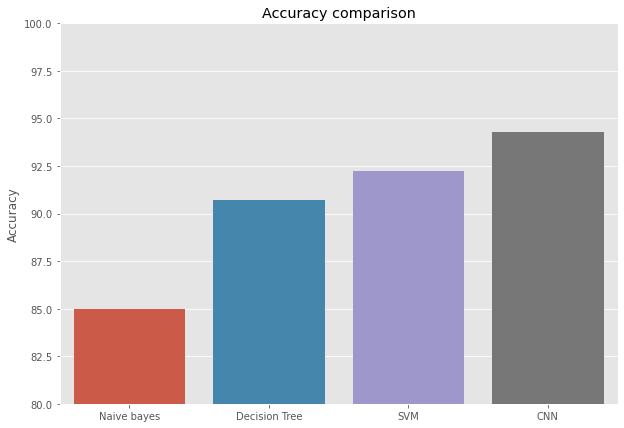

In [73]:
x=['Naive bayes','Decision Tree','SVM','CNN']
import matplotlib as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,7)


y=ac
import numpy as np
import seaborn as sns
ax=sns.barplot(x,y)
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
low = min(y)
high = max(y)
ax.set_ylim(80,100)

In [57]:
f

[0.88, 0.9, 0.92, 0.94]

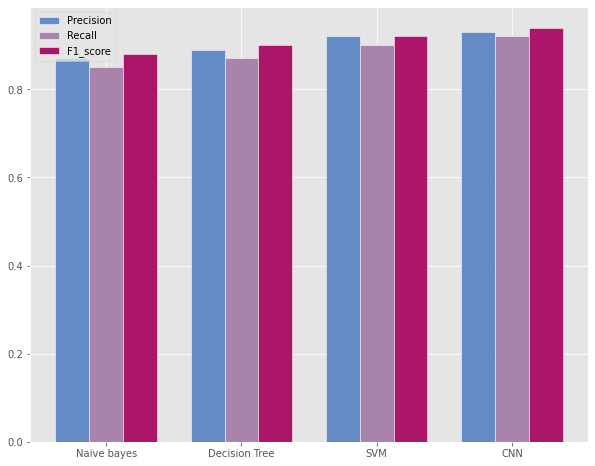

In [58]:
import numpy as np
import matplotlib.pyplot as plt
#pr,r=model_pred.precision_recall(3)

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,8)




# set width of bar
barWidth = 0.25
 
# set height of bar


bars1 =  p
bars2 = r
bars3=f

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3= [x + barWidth for x in r2]


 
# Make the plot
plt.bar(r1, bars1, color='#658bc7', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r2, bars2, color='#a884ad', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, bars3, color='#ab156a', width=barWidth, edgecolor='white', label='F1_score')

 
# Add xticks on the middle of the group bars
plt.xlabel('', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))],['Naive bayes','Decision Tree','SVM','CNN'])
 
# Create legend & Show graphic
plt.legend()
plt.show()